<a id=0></a>
# 10.Classification models
※　分類の機械学習モデル

---
### [1. 探索的データ分析（EDA）、スケーリング](#1)
### [2. Random Forest Classifier](#2)
### [3. KNeighbors Classifier](#3)
### [4. SVC](#4)
### [5. Logistic Regression](#5)
### [6. モデルの評価](#6)
---

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='talk', style='darkgrid', font="MS GOTHIC")

---
<a id=1></a>
[Topへ](#0)

---
## 1. 探索的データ分析（EDA)、スケーリング

* 乳がんデータセット
* 相関関係
* 分布、外れ値などの確認
* スケーリング
---

乳がんデータセット

In [22]:
from sklearn.datasets import load_breast_cancer

In [23]:
breast_cancer = load_breast_cancer()

In [24]:
df_X = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
df_y = pd.DataFrame(breast_cancer['target'], columns=['target'])

In [25]:
df = pd.concat([df_X, df_y], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [26]:
df.shape

(569, 31)

In [27]:
df['target'].unique()
# 二値分類

array([0, 1])

In [28]:
print(breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

相関関係

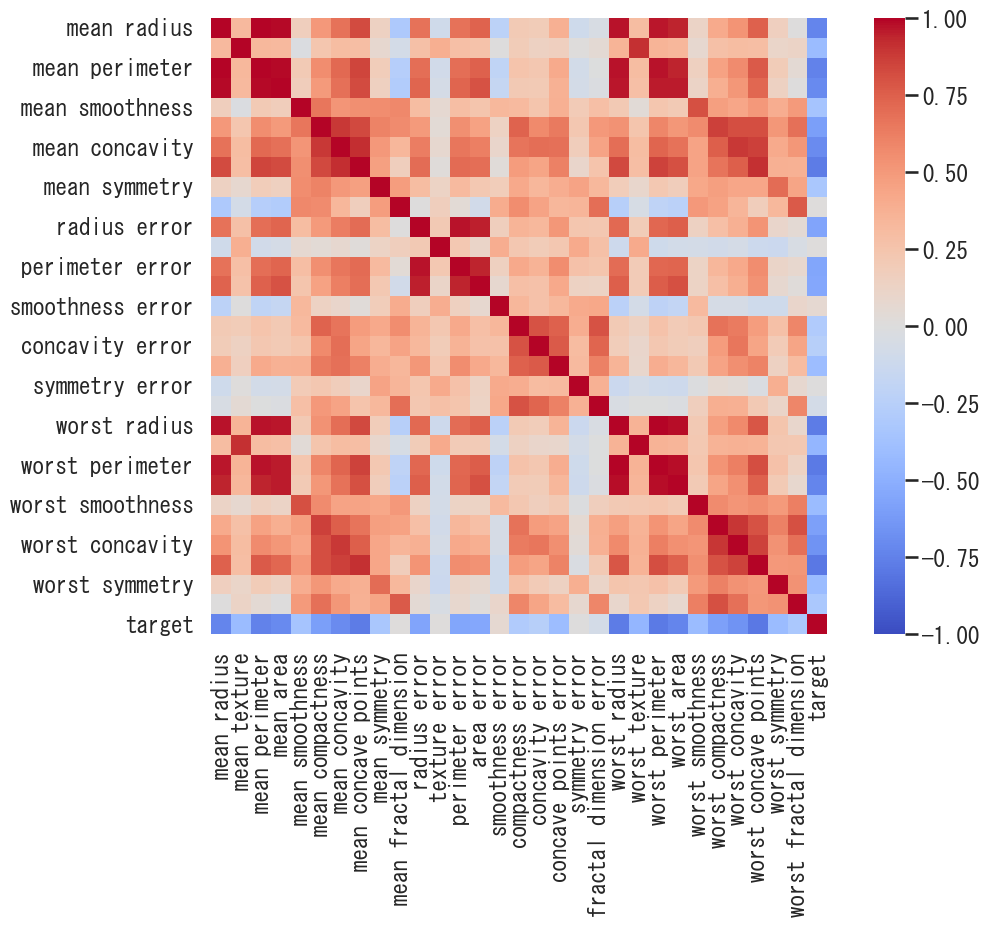

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), square=True, vmin=-1, cmap='coolwarm')
plt.show()
# 似た構造が9つある

In [31]:
# targetとは負の相関。0が悪性
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [32]:
# 特徴量名にmeanかtargetを含む、を使って対象のカラムだけを取り出す
df.columns.str.contains('mean|target')

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True])

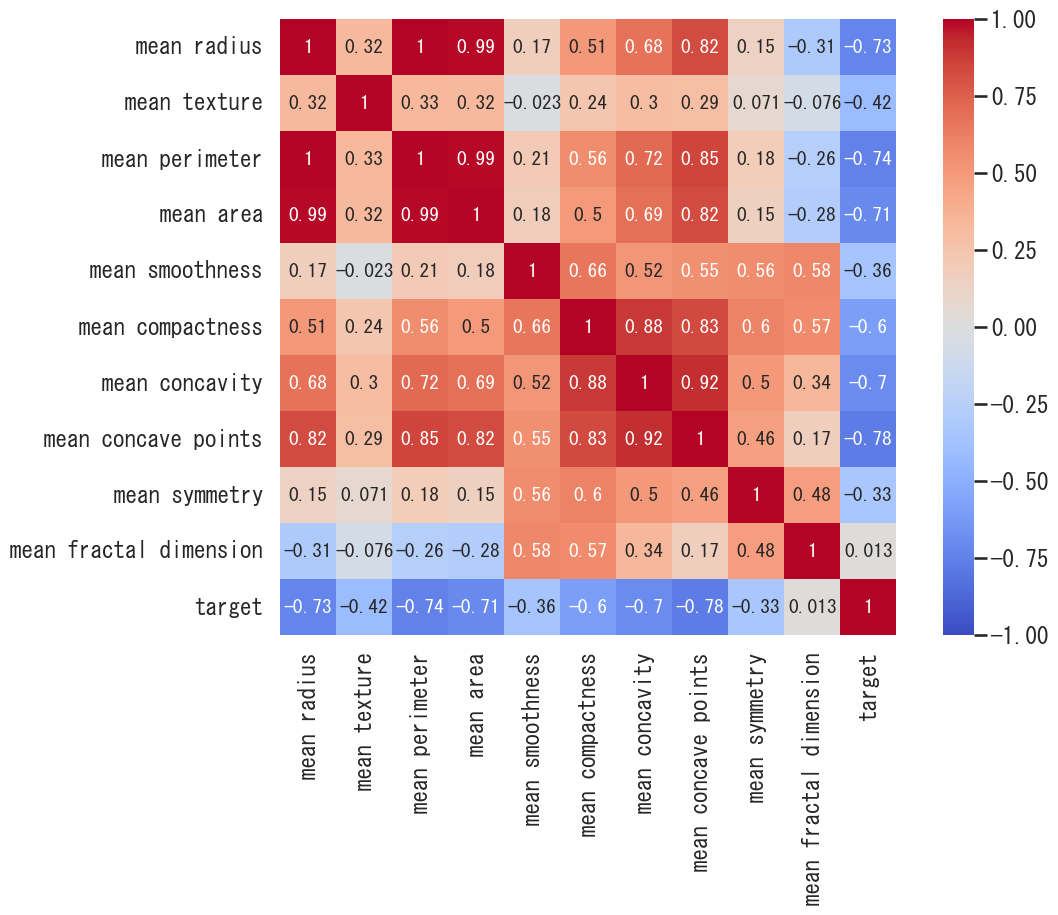

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.loc[:, df.columns.str.contains('mean|target')].corr(), annot=True, annot_kws={'size':14}, square=True, vmin=-1, cmap='coolwarm')
plt.show()

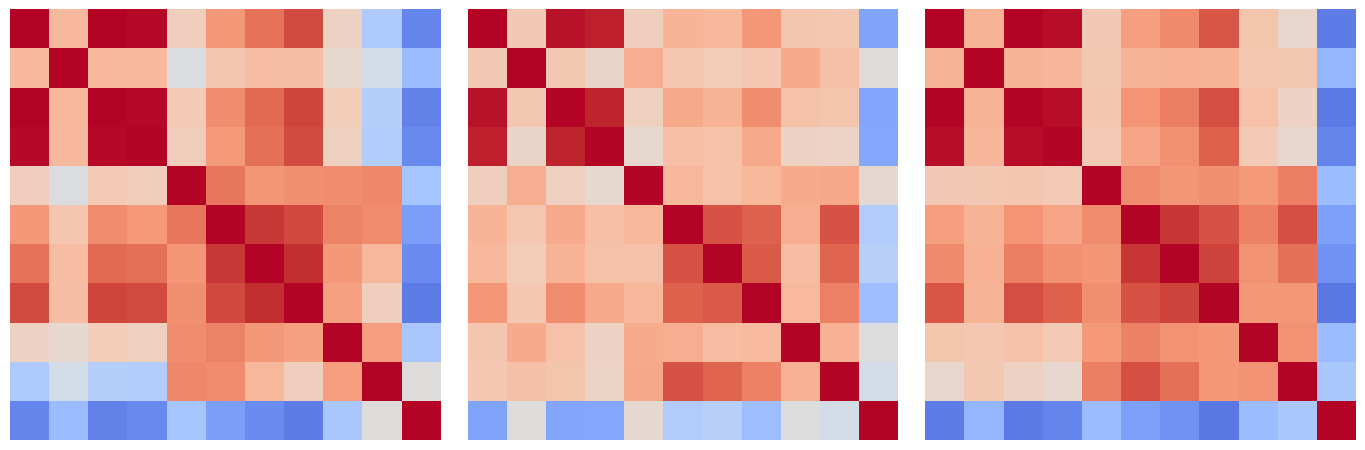

In [34]:
# 三種類を見比べてみる
fig, axes = plt.subplots(1, 3, figsize=(14, 6), tight_layout=True)
sns.heatmap(df.loc[:, df.columns.str.contains('mean|target')].corr(), xticklabels=False, yticklabels=False, cbar=False, square=True, vmin=-1, cmap='coolwarm', ax=axes[0])
sns.heatmap(df.loc[:, df.columns.str.contains('error|target')].corr(), xticklabels=False, yticklabels=False, cbar=False, square=True, vmin=-1, cmap='coolwarm', ax=axes[1])
sns.heatmap(df.loc[:, df.columns.str.contains('worst|target')].corr(), xticklabels=False, yticklabels=False, cbar=False, square=True, vmin=-1, cmap='coolwarm', ax=axes[2])
plt.show()

In [35]:
# 全てが揃っている方が正確な分析ができるかもしれないが、今回はmeanだけを切り出して使用する
df = df.loc[:, df.columns.str.contains('mean|target')]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


分布、外れ値などの確認

In [ ]:
def plot_data(feature):
    fig, axes = plt.subplots(1, 3, figsize=(16, 6), tight_layout=True)
    sns.histplot(data=df, y=feature, hue='target', ax=axes[0])   # y=featureとして向きをそろえる
    sns.boxplot(data=df, x='target', y=feature, width=0.8, ax=axes[1])
    sns.swarmplot(data=df, x='target', y=feature, alpha=0.8, size=3, ax=axes[2])
    plt.suptitle(feature)
    plt.show()

In [ ]:
for feature in df.columns[:-1]:
    plot_data(feature)

スケーリング

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# stratify:階層化、trainとtestの中でのｙのクラスの割合を一定にする
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=17, stratify=df.iloc[:, -1])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
# testデータに対してもtrainデータで使ったスケーラーを用いる
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 1の割合を調べると、ほぼ同じ比率になっている(stratify)
y_train.sum()/len(y_train), y_test.sum()/len(y_test)

---
<a id=2></a>
[Topへ](#0)

---
## 2. RandomForestClassifier

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* 予想された確率
* confusion matrix（混同行列）
* precision（適合率）、 recall（再現率）、f1_score（F1値）
---

n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True, random_state=None, max_samples=None

モデルのインポート

In [ ]:
from sklearn.ensemble import RandomForestClassifier

モデルインスタンスの作成

In [ ]:
rf_model = RandomForestClassifier(random_state=17)

モデルの構築・属性・予測・スコア

In [ ]:
rf_model.fit(X_train_scaled, y_train)

In [ ]:
rf_pred = rf_model.predict(X_test_scaled)

In [ ]:
rf_pred[:5]

In [ ]:
# 分類モデルのスコアは正解の割合
rf_model.score(X_test_scaled, y_test)

In [ ]:
rf_model.score(X_train_scaled, y_train)

予想された確率

In [ ]:
# 0である確率、1である確率
prob = rf_model.predict_proba(X_test_scaled)
prob[:10]

confusion matrix（混同行列）

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [ ]:
confusion_matrix(y_test, rf_pred)

In [ ]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
162/171

precision（適合率）、 recall（再現率）、f1_score（F1値）

In [ ]:
print(classification_report(y_test, rf_pred))

In [ ]:
60/65, 102/106, 60/64, 102/107

In [ ]:
# 調和平均　1 / {(1/x + 1/y) / 2}
# 2xy/(x + y)
# 速度、濃度などのキーワードと共に検索し、具体例を確認してください

In [ ]:
# 適合率、ポジティブの予想がどれだけ合っているか  TP / (TP + FP)
pre = precision_score(y_test, rf_pred)   # 'macro', 'weighted', None
pre

In [ ]:
# 再現率、実際と予想がどれだけ合っているか　TP / (TP + FN)
rec = recall_score(y_test, rf_pred)
rec

In [ ]:
f1_score(y_test, rf_pred)

In [ ]:
2 * pre * rec / (pre + rec)

In [ ]:
# スケーリングしていない場合
rf_model_new = RandomForestClassifier(random_state=17)
rf_model_new.fit(X_train, y_train)
rf_pred_new = rf_model_new.predict(X_test)
print(classification_report(y_test, rf_pred_new))
# あるひとつの特徴量の値で分岐させていくため、特徴量間のスケールの差はほとんど影響しない

---
<a id=3></a>
[Topへ](#0)

---
## 3. KNeighbors Classifier

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

n_neighbors=5, weights='uniform'

モデルのインポート

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

モデルインスタンスの作成

In [ ]:
kn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

モデルの構築・予測・スコア

In [ ]:
kn_model.fit(X_train_scaled, y_train)

In [ ]:
kn_pred = kn_model.predict(X_test_scaled)
kn_pred[:10]

In [ ]:
kn_model.score(X_test_scaled, y_test)

In [ ]:
kn_model.score(X_train_scaled, y_train)

confusion matrix（混同行列）

In [ ]:
sns.heatmap(confusion_matrix(y_test, kn_pred), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True, Label')
plt.show()

In [ ]:
print(classification_report(y_test, kn_pred))

In [ ]:
# スケーリングしていない場合
kn_model_new = KNeighborsClassifier()
kn_model_new.fit(X_train, y_train)
kn_pred_new = kn_model_new.predict(X_test)
print(classification_report(y_test, kn_pred_new))
# 座標の距離が重要な材料になるため、スケーリングをしていない場合は影響を受ける

---
<a id=4></a>
[Topへ](#0)

---
## 4. SVC

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

C=1.0, gamma='scale', random_state=None

モデルのインポート

In [ ]:
from sklearn.svm import SVC

モデルインスタンスの作成

In [ ]:
svc_model = SVC(random_state=17)
# 正則化（過学習などを防ぐため罰則を付けて調整する）を用いることもできる

モデルの構築・予測・スコア

In [ ]:
svc_model.fit(X_train_scaled, y_train)

In [ ]:
svc_pred = svc_model.predict(X_test_scaled)
svc_pred[:10]

In [ ]:
svc_model.score(X_test_scaled, y_test)

In [ ]:
svc_model.score(X_train_scaled, y_train)

confusion matrix（混同行列）

In [ ]:
sns.heatmap(confusion_matrix(y_test, svc_pred), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test, svc_pred))

In [ ]:
# スケーリングしていない場合
svc_model_new = SVC()
svc_model_new.fit(X_train, y_train)
svc_pred_new = svc_model_new.predict(X_test)
print(classification_report(y_test, svc_pred_new))
# このモデルでも空間、領域を使うためスコアが下がっている

---
<a id=5></a>
[Topへ](#0)

---
## 5. Logistic Regression

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

C=1.0, random_state=None, max_iter=100

モデルのインポート

In [ ]:
from sklearn.linear_model import LogisticRegression

モデルインスタンスの作成

In [ ]:
log_model = LogisticRegression(random_state=17)   # max_iter=150

モデルの構築・予測・スコア

In [ ]:
log_model.fit(X_train_scaled, y_train)

In [ ]:
log_pred = log_model.predict(X_test_scaled)
log_pred[:10]

In [ ]:
log_model.score(X_test_scaled, y_test)

In [ ]:
log_model.score(X_train_scaled, y_train)

confusion matrix（混同行列）

In [ ]:
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test, log_pred))

In [ ]:
log_model_new = LogisticRegression(max_iter=150, random_state=17)
log_model_new.fit(X_train, y_train)
log_pred_new = log_model_new.predict(X_test)
print(classification_report(y_test, log_pred_new))
# スケーリングはほぼ影響を与えない。スケーリングしない方がわずかに結果がよくなっている

---
<a id=6></a>
[Topへ](#0)

---
## 6. モデルの評価

* precision_recall_curve  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html  
* f1_score, precision, recall
* roc_curve  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.htm  
---

precision_recall_curve

In [ ]:
# モデルとしてSVCを用いる
model = SVC(probability=True)   # SVCで確率を取得したい場合はprobability=Trueを設定する
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

In [ ]:
prob = model.predict_proba(X_test)
prob[:10]
# 右が1、陽性である確率

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
# precision_recall_curve(y_test, prob[:, 1])

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, prob[:, 1])
# 陽性の確率を元に考えていく

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=recall, y=precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
# 適合率、ポジティブの予想がどれだけ合っているか  TP / (TP + FP)
# 再現率、実際と予想がどれだけ合っているか　TP / (TP + FN)

# 閾値が1に近い => ほぼすべてネガティブに分類される。FP=0、precisionは1になる。TP自体も0個になるとすればRecallは0に近づく。
# 閾値が0に近い => ほぼすべてポジティブに分類される。FN=0、recallは1になる。precisionはTP÷全サンプル数の値に近づく（今回は0.63程度）。ただし、閾値は0.345を最低としているため、上記の値で留まっている

f1_score, precision, recall

In [ ]:
# precision, recallからf1スコアを計算
f1_scores = []
for p, r in zip(precision, recall):
    score = 2 * p * r /(p + r)
    f1_scores.append(score)
f1_scores[:5]

In [ ]:
# precision, recall, threshold = precision_recall_curve(y_test, prob[:, 1])で取得した要素数が異なることに注意
len(threshold), len(f1_scores)

In [ ]:
plt.figure(figsize=(9, 6))
sns.lineplot(x=threshold, y=f1_scores[:-1], label='f1_score')   # 最終インデックスの手前までにする
sns.lineplot(x=threshold, y=precision[:-1], label='precision')
sns.lineplot(x=threshold, y=recall[:-1], label='recall')
plt.xlabel('threshold')
plt.legend()
plt.show()

In [ ]:
np.max(f1_scores)

In [ ]:
# 最大値のインデックスを取得
np.argmax(f1_scores)

In [ ]:
# f1スコアが最大となる時のprecision, recall, threshold
precision[17], recall[17], threshold[17]

In [ ]:
# np.whereを用いて改めて0,1の予測アレイを作成
pred_new = np.where(prob[:, 1] >= threshold[17], 1, 0)   # threshold=threshold[17]の時にf1スコアが最大になる

In [ ]:
f1_score(y_test, pred_new)

roc_curve

In [ ]:
from sklearn.metrics import plot_roc_curve, auc, roc_curve

In [ ]:
# plot_roc_curveでfpr, tprの変化をプロットする
fig, axes = plt.subplots(figsize=(8, 6), tight_layout=True)
plot_roc_curve(model, X_test, y_test, marker='o', markersize=5, ax=axes)
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
sns.lineplot(x=[0, 1], y=[0, 1], color='red', linestyle='--', ax=axes)
plt.show()

In [ ]:
# fpr = fp / (tn + fp)　真にネガティブであるものの中で、ネガティブと予測されたものの割合
# tpr = tp / (tp + fn)　真にポジティブであるものの中で、ポジティブと予測されたものの割合

In [ ]:
# roc_curveを用いてfpr, tpr, thresholdの値を求める
fpr, tpr, threshold = roc_curve(y_test, prob[:, 1])

In [ ]:
# aucの算出
auc(fpr, tpr)

In [ ]:
# (1, 0)からの距離が最大になるfpr,tprの組を求める
np.max((fpr - 1)**2 + tpr**2)

In [ ]:
# そのインデックスを求める
np.argmax((fpr - 1)**2 + tpr**2)

In [ ]:
# そのthresholdを求める
threshold[16]

In [ ]:
# ROCカーブ理解のためのプロットを作っていく
np.random.seed(17)
pos = np.random.randn(1000) + 1.5
neg = np.random.randn(1000) - 1.5
neg2 = np.random.randn(1000) - 7
neg3 = np.random.randn(900) + 1.5

In [ ]:
# あるモデルによりポジティブである確率を求めた
# 中央付近では確率が高くても実際にはネガティブ、低くてもポジティブなものが混在する
plt.figure(figsize=(10, 4))
sns.histplot(pos, color='#0c0', alpha=0.5, label='positive')
sns.histplot(neg, color='#00c', alpha=0.5, label='negative')
plt.legend()
plt.xticks([-5.2, 5], [0, 1])
plt.yticks([], [])
plt.xlabel('positive probability')
plt.show()
# 閾値を中央付近にあると、バーの重なる部分が FP, FN になる

In [ ]:
# このモデルでは100％の精度で分離することができている
plt.figure(figsize=(10, 4))
sns.histplot(pos, color='#0c0', alpha=0.5, label='positive')
sns.histplot(neg2, color='#00c', alpha=0.5, label='negative')
plt.legend()
plt.xticks([-10.5, 5], [0, 1])
plt.yticks([], [])
plt.xlabel('positive probability')
plt.show()
# ある閾値でははっきりと0：1に分かれる

In [ ]:
## ランダム（無作為）な確率をそれぞれに与える場合、どの確率においてもポジティブ、ネガティブの割合は一定
plt.figure(figsize=(10, 4))
sns.histplot(pos, color='#0c0', alpha=0.5, label='positive')
sns.histplot(neg3, color='#00c', alpha=0.5, label='negative')
plt.legend()
plt.xticks([-2, 5], [0, 1])
plt.yticks([], [])
plt.xlabel('positive probability')
plt.show()
# 閾値を下げていくとTPRが上がり、同じ割合でFPRも上がっていく
# 結果として直線になると考えることができる

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---